<a href="https://colab.research.google.com/github/Mosaraf15/Joining-Data-with-pandas/blob/main/01_Data_Merging_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
taxi_owners = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/taxi_owners (1).p')
taxi_veh = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/taxi_vehicles (1).p')

wards = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/ward.p').astype(object)
census = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/census.p').astype(object)
#wards_altered = pd.read_csv('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/wards_altered.csv').astype(object)
#census_altered = pd.read_csv('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/census_altered.csv').astype(object)

licenses = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/licenses.p')
biz_owners = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/business_owners.p')

ridership = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/cta_ridership.p')
cal = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/cta_calendar.p')
stations = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/stations.p')

wards = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/ward.p')
licenses = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/licenses.p')
zip_demo = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/zip_demo.p')

land_use = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/land_use.p')

#**Your first inner join**
You have been tasked with **figuring** out what the most popular types of **fuel** used in **Chicago taxis** are. To complete the analysis, you need to **merge** the **taxi_owners** and **taxi_veh** tables together on the **vid column**. You can then use the merged table along with the **.value_counts()** method to find the most common fuel_type.

Since you'll be working with pandas throughout the course, the package will be preloaded for you as **pd** in each exercise in this course. Also the **taxi_owners** and **taxi_veh** DataFrames are loaded for you.

**Instructions**
1. Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.

2. Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.
3. Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.

In [ ]:
taxi_owners.head()


,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [ ]:
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [ ]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
display(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

#**Inner joins and number of rows returned**
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered, and census_altered. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

For this exercise, it is important to know that the wards and census tables start with 50 rows.

**Instructions**

1. Merge wards and census on the ward column and save the result to wards_census.

2. Merge the wards_altered and census tables on the ward column, and notice the difference in returned rows.
3. Merge the wards and census_altered tables on the ward column, and notice the difference in returned rows.

In [ ]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [ ]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [ ]:
# Print the first few rows of the census_altered table to view the change
#print(census_altered[['ward']].head())
display(census[['ward']].head())

# Merge the wards and census_altered tables on the ward column
#wards_census_altered = wards.merge(census_altered, on= 'ward')
wards_census = wards.merge(census, on= 'ward')

# Print the shape of wards_census_altered
print('wards_census_ table shape:', wards_census.shape)

,ward
0,1
1,2
2,3
3,4
4,5


wards_census_ table shape: (50, 9)


#**One-to-many merge**
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

The licenses and biz_owners DataFrames are loaded for you.

**Instructions**

1. Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.
2. Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df
3. Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
4. Use the .head() method to print the first few rows of the sorted_df.

In [ ]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [ ]:
biz_owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [ ]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values('account', ascending= False)

# Use .head() method to print the first few rows of sorted_df
display(sorted_df.head())

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970



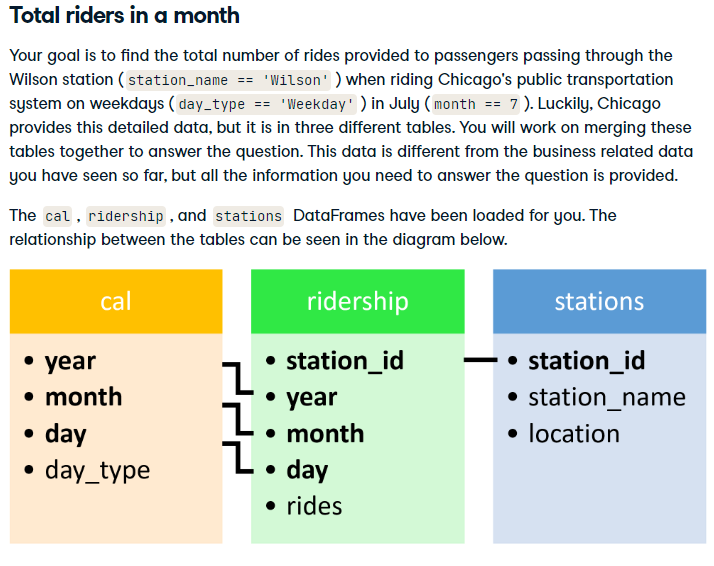

**Instructions**
1. Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. If you code takes too long to run, your merge conditions might be incorrect.
2. Extend the previous merge to three tables by also merging the stations table.

In [ ]:
ridership.head()

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [ ]:
cal.head()

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [ ]:
stations.head()

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [ ]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

ridership_cal_stations.head()

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


3. Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.

In [ ]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7)
                   & (ridership_cal_stations['day_type'] == 'Weekday')
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

#print(filter_criteria)

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


#**Three table merge**
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

The licenses, wards, and zip_demo DataFrames have been loaded for you.

**Instructions**
1. Starting with the licenses table, merge to it the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column.
2. Save result of the three merged tables to a variable named licenses_zip_ward.
Group the results of the three merged tables by the column alderman and find the median income.

In [ ]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [ ]:
zip_demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [ ]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [ ]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on ='ward')

licenses_zip_ward.head()


,account,ward,aid,business,address_x,zip_x,income,alderman,address_y,zip_y
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
1,11280,3,763,PRIME WAY,2251 S STATE ST 1ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
2,15015,3,NaN,"SOUTHVIEW MANOR, INC.",3311 S MICHIGAN AVE,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
3,19168,3,666,BP AMOCO,3101 S MICHIGAN AVE 1ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
4,205980,3,763,J & J FISH & CHICKEN,8 E CERMAK RD,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609


In [ ]:
# Print the results by alderman and show median income
display(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

,income
alderman,
Ameya Pawar,66246.0
Anthony A. Beale,38206.0
Anthony V. Napolitano,82226.0
Ariel E. Reyboras,41307.0
Brendan Reilly,110215.0
Brian Hopkins,87143.0
Carlos Ramirez-Rosa,66246.0
Carrie M. Austin,38206.0
Chris Taliaferro,55566.0


#**One-to-many merge with multiple tables**
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.

**Instructions**
1. Merge land_use and census on the ward column. Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table. Save this to the variable land_cen_lic.
2. Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, then count the number of accounts. Save the results to pop_vac_lic.
3. Sort pop_vac_lic by vacant, account, andpop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.

In [ ]:
land_use.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [ ]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [ ]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'],
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'],
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
#print(sorted_pop_vac_lic.head())
display(sorted_pop_vac_lic.head())

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156
